# SSSM core example

In [ ]:
pip install sssm --upgrade

In [53]:
import numpy as np
from sssm import ssm
import mne
import matplotlib.pyplot as plt

## load data

In [37]:
raw = mne.io.read_raw_cnt(r"C:\Users\bkxcy\workspace\eeg_data_process\data\health\sleep\baoxiaoyu20211201s.cnt")
raw.load_data()

## pre-process

In [37]:
raw = raw.filter(0.7,45)
data = (raw.resample(100).get_data(units="uV")).astype(np.float16)

Reading 0 ... 5604509  =      0.000 ... 22418.036 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.7 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.70
- Lower transition bandwidth: 0.70 Hz (-6 dB cutoff frequency: 0.35 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1179 samples (4.716 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.7s finished


## predict plot

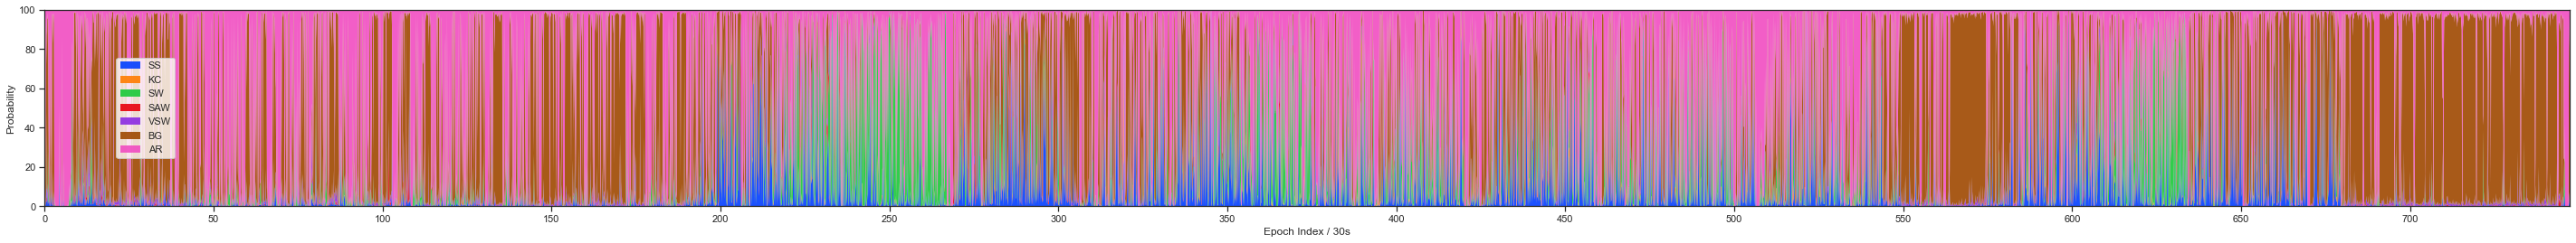

In [42]:
model = ssm.SSM()
ret = model.predict(data[17:18],step=300)
model.plot_predictions()

### input 1 epoch(30s) data

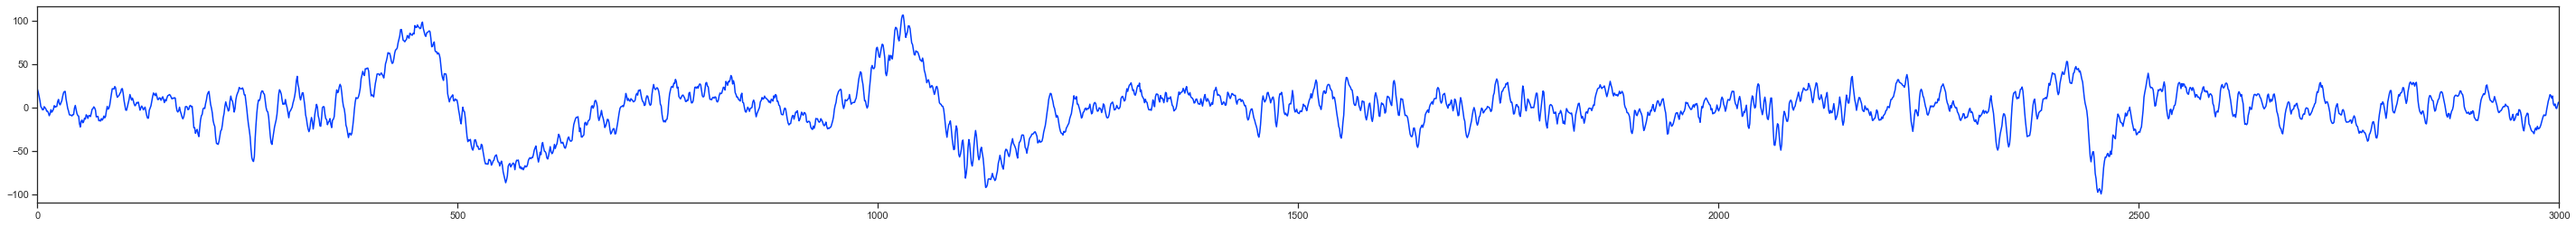

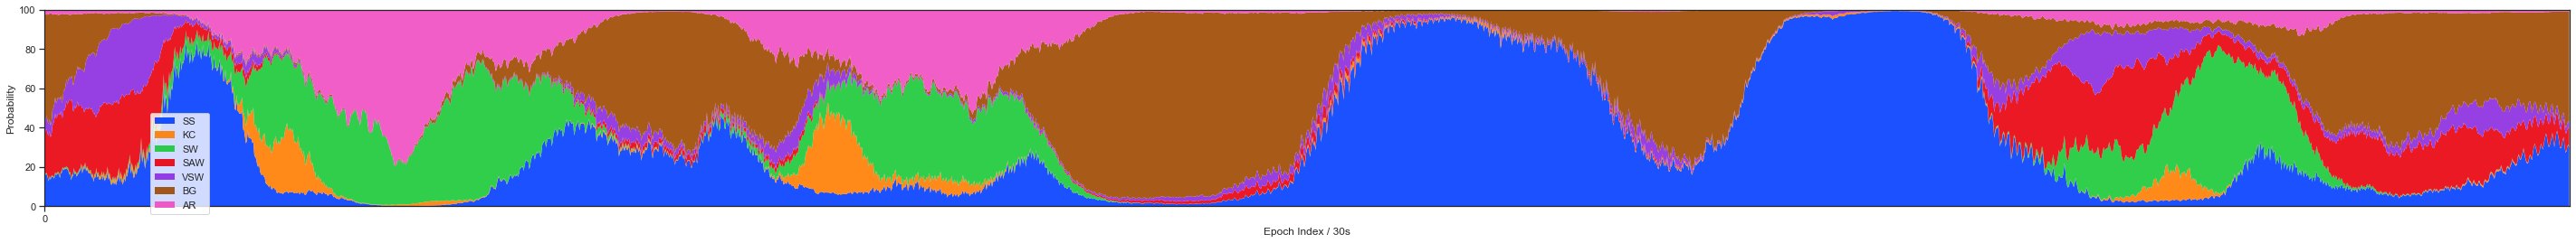

In [138]:
# model = ssm.SSM(model_name='ckp_last.pt')
model = ssm.SSM()
epoch_id = 200
input_data = data[17:18,epoch_id*3000:(epoch_id+1)*3000]
plt.figure(figsize=(50,4))
plt.plot(input_data.T)
plt.xlim([0,3000])
plt.show()
ret = model.predict(input_data,step=1)
model.plot_predictions()

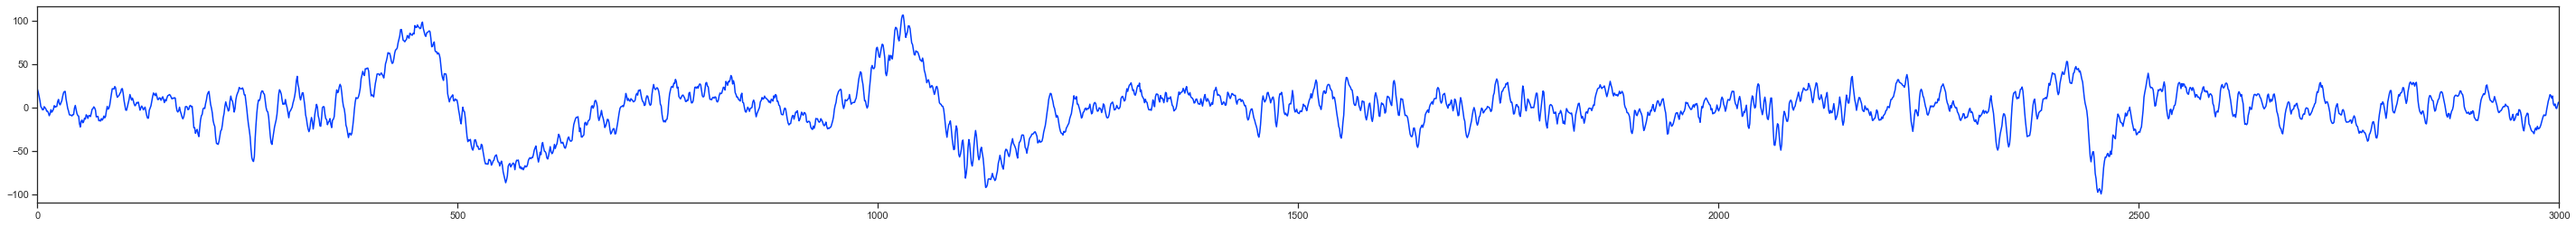

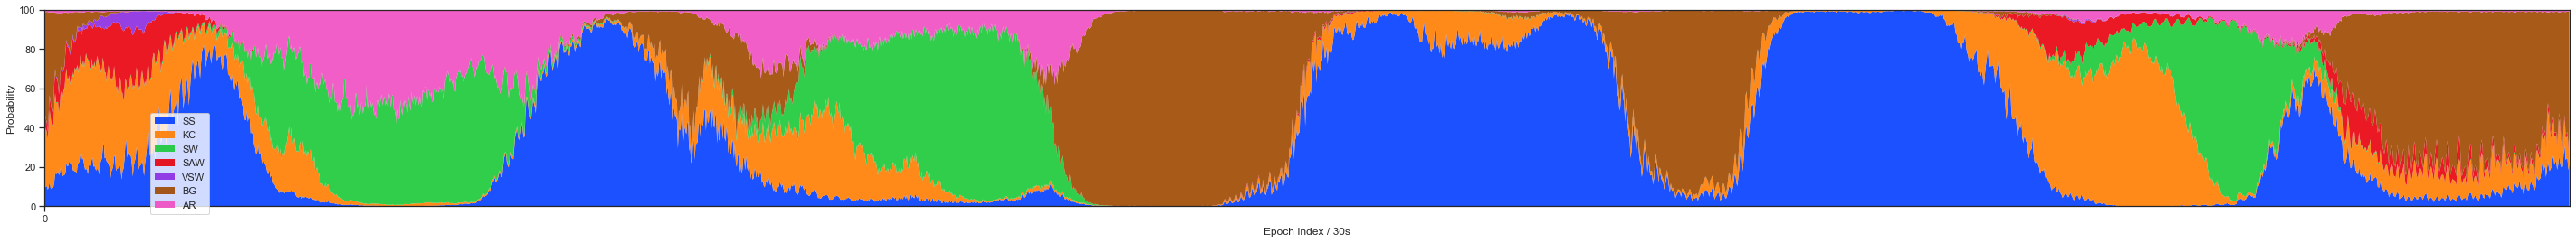

In [135]:
model = ssm.SSM(model_name='ckp_last.pt')
# model = ssm.SSM()
epoch_id = 200
input_data = data[17:18,epoch_id*3000:(epoch_id+1)*3000]
plt.figure(figsize=(50,4))
plt.plot(input_data.T)
plt.xlim([0,3000])
plt.show()
ret = model.predict(input_data,step=1)
model.plot_predictions()

### input full night data

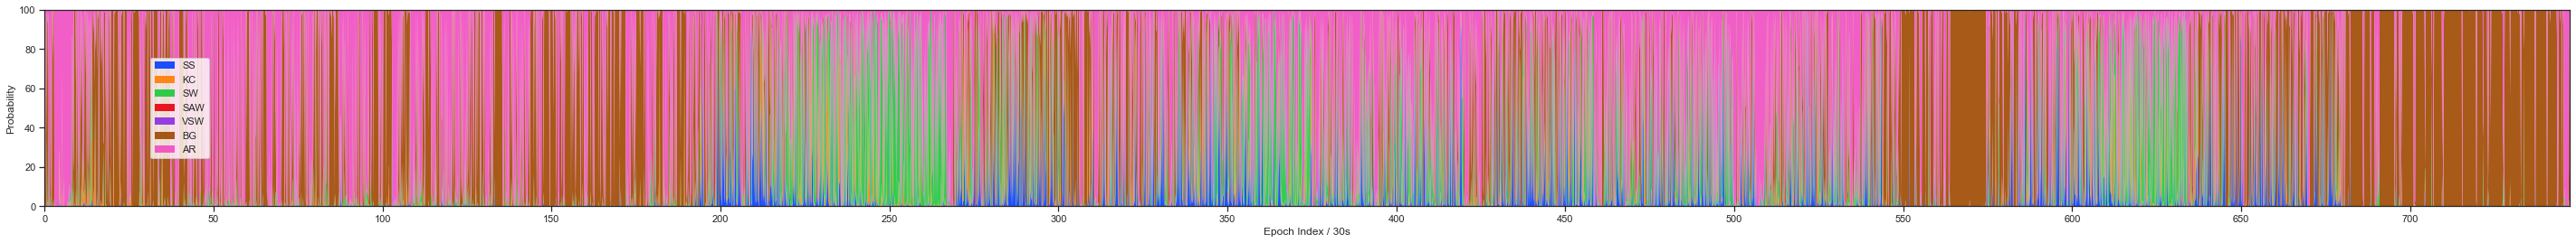

In [139]:
model = ssm.SSM(model_name='ckp_last.pt')
ret = model.predict(data[17:18],step=300)
model.plot_predictions()

## get results

In [140]:
df = model.to_pandas(event_threshold={
                'Spindle': 0.8,
                'Background': 0.8,
                'Arousal': 0.8,
                'K-complex': 0.8,
                'Slow wave': 0.8,
                'Vertex Sharp': 0.8,
                'Sawtooth': 0.8})
df

,Start,End,Duration,label,predict_proba,epoch_id
1,600,900,300,Arousal,0.996692,0
2,900,1800,900,Background,0.982475,0
4,2100,3300,1200,Background,0.956050,0
6,3600,4500,900,Arousal,0.982866,0
7,4500,4800,300,Background,0.995384,0
...,...,...,...,...,...,...
3296,2234100,2234400,300,Arousal,0.998787,0
3297,2234400,2235900,1500,Background,0.955171,0
3298,2235900,2240700,4800,Arousal,0.974922,0
3299,2240700,2241300,600,Background,0.932963,0


In [141]:
spindles_df = df.loc[df.label=='Spindle'].reset_index(drop=True)
kc_df = df.loc[df.label=='K-complex'].reset_index(drop=True)
spindles_df = spindles_df.sort_values('predict_proba',ascending=False).reset_index(drop=True)
kc_df = kc_df.sort_values('predict_proba',ascending=False).reset_index(drop=True)

In [142]:
spindles_df

,Start,End,Duration,label,predict_proba,epoch_id
0,1168800,1169100,300,Spindle,0.999875,0
1,1933200,1933500,300,Spindle,0.999850,0
2,1992000,1992300,300,Spindle,0.999827,0
3,1007400,1007700,300,Spindle,0.999812,0
4,1062600,1062900,300,Spindle,0.999789,0
...,...,...,...,...,...,...
248,1856400,1856700,300,Spindle,0.802168,0
249,1246200,1246500,300,Spindle,0.802033,0
250,1549200,1549500,300,Spindle,0.801724,0
251,860700,861000,300,Spindle,0.801277,0


In [143]:
kc_df

,Start,End,Duration,label,predict_proba,epoch_id
0,891600,891900,300,K-complex,0.941446,0
1,695700,696000,300,K-complex,0.936204,0
2,1420200,1420500,300,K-complex,0.933121,0
3,957900,958200,300,K-complex,0.923686,0
4,1834500,1834800,300,K-complex,0.915197,0
5,797400,797700,300,K-complex,0.905449,0
6,814200,814500,300,K-complex,0.887404,0
7,1919400,1919700,300,K-complex,0.886306,0
8,735900,736200,300,K-complex,0.885708,0
9,1841400,1841700,300,K-complex,0.882073,0


### get predicted data

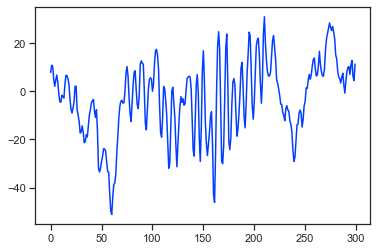

In [144]:
_id = 0
plt.plot(data[17,spindles_df.loc[_id].Start:spindles_df.loc[_id].End])

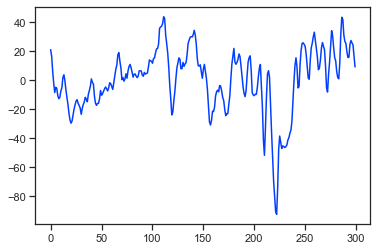

In [145]:
_id = 0
plt.plot(data[17,kc_df.loc[_id].Start:kc_df.loc[_id].End])

## get feature

In [146]:
feature = model.feature.cpu().numpy()

feature.shape # n_epoch, n_sample, m,n

(1, 7472, 128, 15)

In [148]:
feature = feature[0].reshape(feature.shape[1],-1)
feature.shape# n_sample, n_feature

(7472, 1920)

In [149]:
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE as PCA
import pandas as pd
import seaborn as sns
pca = PCA(n_components=2, random_state=0)

In [150]:
transformed_feature = pca.fit_transform(X=feature)

C:\Users\bkxcy\anaconda3\envs\torch_cuda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bkxcy\anaconda3\envs\torch_cuda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [151]:
x_component, y_component = transformed_feature[:, 0], transformed_feature[:, 1]
feature_df = pd.DataFrame({
    'x':transformed_feature[:, 0],
    'y':transformed_feature[:, 1],
    'Event Type':[['SS','KC','SW','SAW','VSW','BG','MA'][i] for i in ret],
})

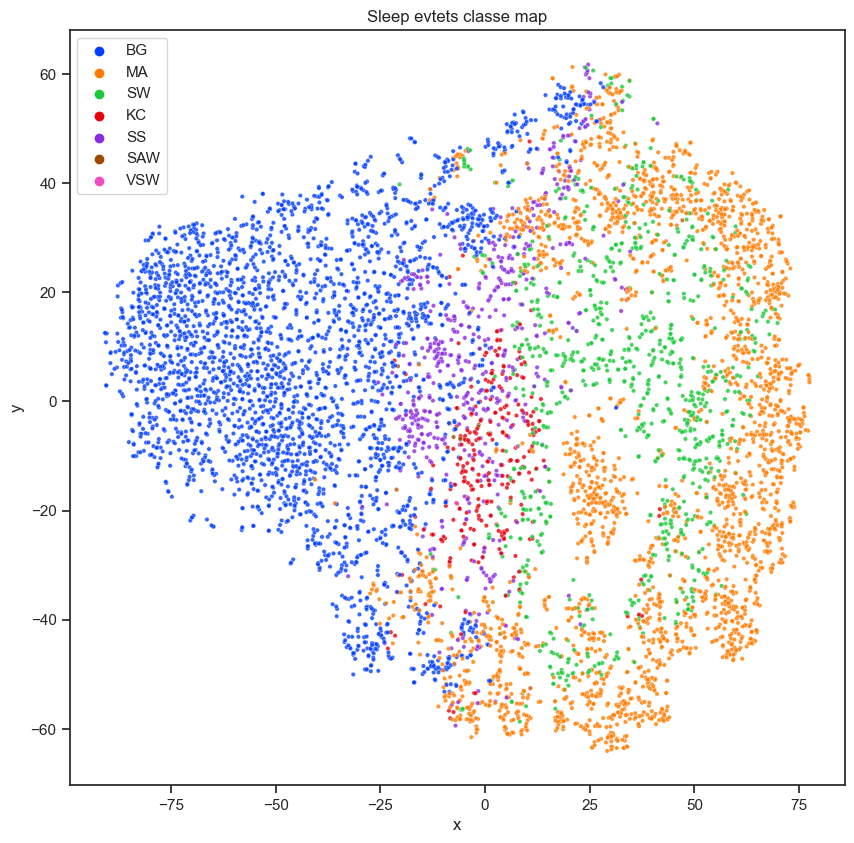

In [152]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(10, 10), dpi=100)
# plt.scatter(x=x_component, y=y_component, c=test['labels'], cmap='tab20', s=5, alpha=8/10)
sns.scatterplot(data=feature_df,x='x',y='y',hue='Event Type',palette='bright',s=10,alpha=0.8)
plt.title('Sleep evtets classe map')
plt.legend(markerscale=1)
# plt.legend(['Spindle','K-complex','Slow-wave','Sawtooth','Vertex Sharp','Background','Arousal']) 
# plt.legend()
plt.show()